# Base Power Company Report

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

The following analyses use public data for the United States from FRED and IRENA to demonstrate how, if this were Base's private data, to which I currently have no access, I would showcase three key metrics that align with Base's goals and stage of growth.

Capacity Utilization (CU) and the Industrial Production Index (IPI) are critical economic indicators that measure industrial efficiency and output, directly aligning with Base's goals of optimizing resource utilization and driving industrial growth. CU reflects how effectively industries use their productive capacity, while IPI tracks real industrial output across utilities. By analyzing CU and IPI trends, Base can identify opportunities to maximize operational efficiency and expand its industrial capacity, supporting its current stage of growth.

In [216]:
cu = pd.read_csv("TCU.csv")
ip = pd.read_csv("INDPRO.csv")

In [217]:
df = pd.merge(cu, ip, on="observation_date", how="inner")

In [218]:
df["Date"] = pd.to_datetime(df["observation_date"])


df["Year"] = df["Date"].dt.year


yearly_data = df.groupby("Year")[["TCU", "INDPRO"]].mean()


yearly_data.reset_index(inplace=True)


In [273]:
tcu_std_dev = np.std(yearly_data["TCU"])
indpro_std_dev = np.std(yearly_data["INDPRO"])
legend_text = f"CU Std Dev: {tcu_std_dev:.2f}<br>IPI Std Dev: {indpro_std_dev:.2f}"


fig1 = px.scatter_3d(
    yearly_data,
    x="Year",
    y="TCU",
    z="INDPRO",
    color_discrete_sequence=["purple"],  
    title="3D Plot: Yearly Averages of CU vs. IPI",
    labels={
        "Year": "Year",
        "TCU": "Average Capacity Utilization",
        "INDPRO": "Average Industrial Production Index"
    },
    template="plotly_white"
)

# Add legend
fig1.add_trace(
    px.scatter_3d(
        yearly_data,
        x=[None],  
        y=[None],
        z=[None]
    ).data[0].update(
        showlegend=True,
        name=legend_text
    )
)


fig1.update_layout(
    width=1400,  
    height=900,  
    title=dict(
        text="3D Plot: Yearly Averages of CU vs. IPI",
        font=dict(size=30),  
        x=0.35, 
        y=0.95  
    ),
    scene=dict(
        xaxis=dict(title=dict(text="Year", font=dict(size=20))),
        yaxis=dict(title=dict(text="Average Capacity Utilization", font=dict(size=20))),
        zaxis=dict(title=dict(text="Average Industrial Production Index", font=dict(size=20))),
        aspectmode="manual", 
        aspectratio=dict(x=1, y=1, z=0.7),  # Adjust proportions to fit within the frame
        camera=dict(
            center=dict(x=-0.5, y=0, z=-.5)  # Shift the plot to the left
        )
    ),
    legend=dict(
        font=dict(size=20),
        x=0.1,  
        y=1,  
        title=dict(text="Legend", font=dict(size=16))
    )
)


plot1_html = fig1.to_html(full_html=False)

fig1


This 3D scatter plot reveals that while the Industrial Production Index (IPI) has significantly increased over time, Capacity Utilization (CU) has remained relatively stable, as indicated by its small variability (standard deviation of 3.95) compared to the larger variability in IPI (23.58). For Base Power Company, this suggests that industrial output is growing without a proportional increase in capacity usage efficiency. This insight highlights the need for Base to continue focusing on scalable energy solutions to support rising production demand, rather than prioritizing efficiency improvements, which don't seem as necessary in driving production. Additionally, the stable CU may indicate underutilized industrial capacity, suggesting opportunities for Base to optimize energy distribution to areas with higher utilization while planning for long-term growth.

_________

The following dataset shows how the company has indeed been focusing on scalable energy solutions. This data shows how the company is meeting energy demand by fuel volume usage over time.

In [81]:
fuel = pd.read_csv("IPFUELS.csv")

In [82]:
fuel = fuel[fuel["observation_date"]>="1967-01-01"]

In [98]:
fuel["Date"] = pd.to_datetime(fuel["observation_date"])


fuel["Year"] = fuel["Date"].dt.year


yearly_fuel = pd.DataFrame(fuel.groupby("Year")["IPFUELS"].mean())

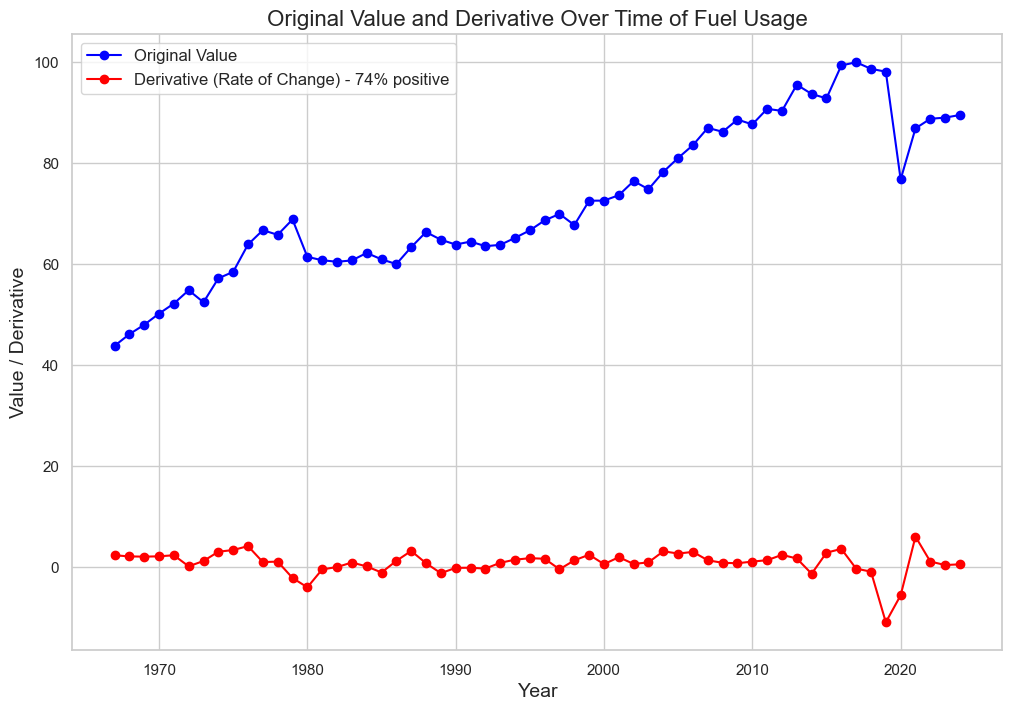

In [274]:
positive_derivative_mean = round(np.mean([1 if i > 0 else 0 for i in yearly_fuel["Derivative"]]), 2)


fig, ax = plt.subplots(figsize=(12, 8))


ax.plot(yearly_fuel.index, yearly_fuel["IPFUELS"], label="Original Value", marker="o", color="blue")


ax.plot(
    yearly_fuel.index,
    yearly_fuel["Derivative"],
    label=f"Derivative (Rate of Change) - {positive_derivative_mean*100:.0f}% positive",
    marker="o",
    color="red"
)

ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Value / Derivative", fontsize=14)
ax.set_title("Original Value and Derivative Over Time of Fuel Usage", fontsize=16)
ax.legend(fontsize=12)
ax.grid(True)


plt.show()

The fact that the derivative is positive 74% of the time but still relatively close to 0 indicates a steady increase over time of fuel usage indicating that the company has most likely increased production by scaling as opposed to enhancing capacity utilization.

___________________

The final plot displays comparatively by year how much electricity generation came from fossil fuels versus solar energy.

In [152]:
energy = pd.read_excel("IRENA_Stats_extract_2024 H2.xlsx", sheet_name=1)

In [183]:
solar = pd.DataFrame(energy[(energy["Country"]=="United States of America (the)") & (energy["Group Technology"]=="Solar energy")].groupby("Year")["Electricity Generation (GWh)"].sum()).iloc[0:-1]
fossil = pd.DataFrame(energy[(energy["Country"]=="United States of America (the)") & (energy["Group Technology"]=="Fossil fuels")].groupby("Year")["Electricity Generation (GWh)"].sum()).iloc[0:-1]



In [210]:
df2 = pd.merge(solar, fossil, left_index=True, right_index=True)

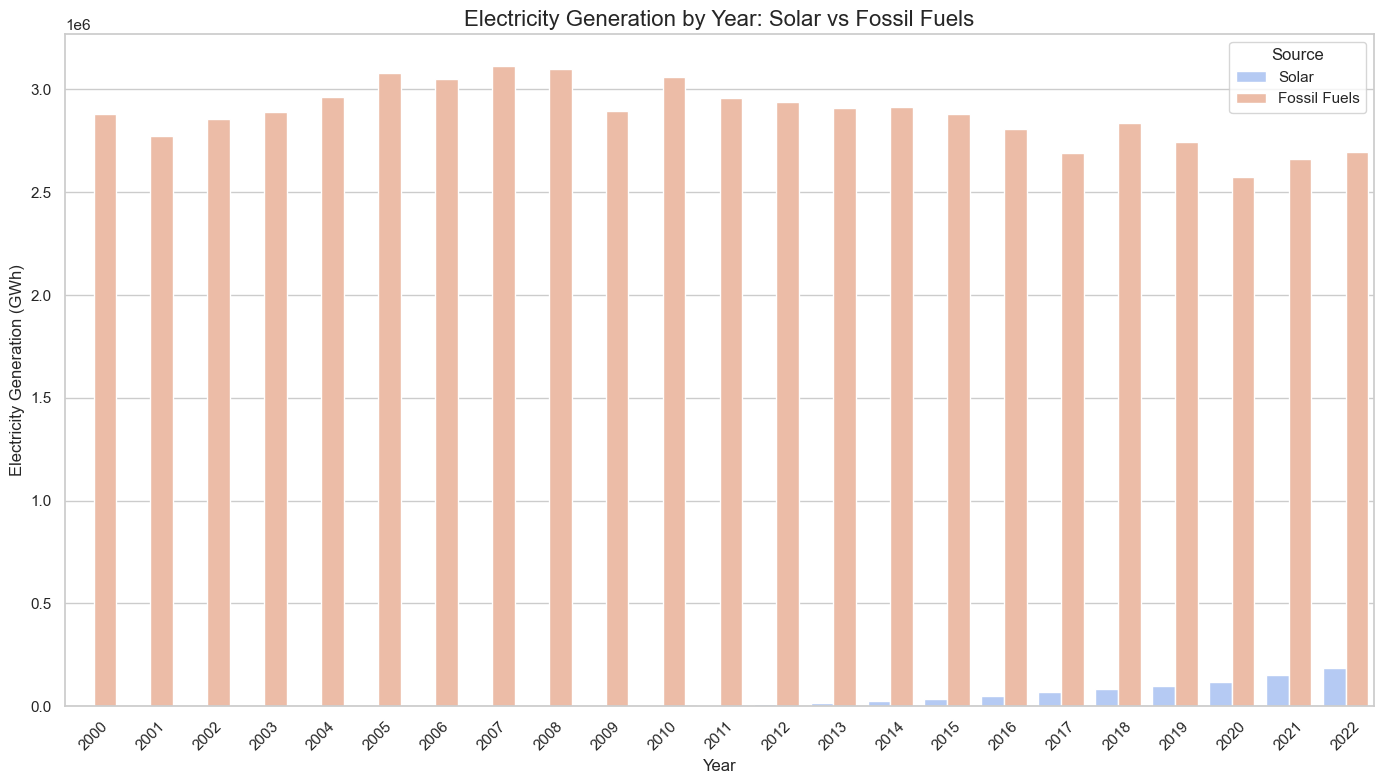

In [212]:
import seaborn as sns

df2 = df2.reset_index()


df_long = df2.melt(
    id_vars="Year",
    value_vars=["Electricity Generation (GWh)_x", "Electricity Generation (GWh)_y"],
    var_name="Source",
    value_name="Electricity Generation (GWh)"
)


df_long["Source"] = df_long["Source"].replace({
    "Electricity Generation (GWh)_x": "Solar",
    "Electricity Generation (GWh)_y": "Fossil Fuels"
})


sns.set_theme(style="whitegrid")


plt.figure(figsize=(14, 8))
sns.barplot(
    data=df_long,
    x="Year",
    y="Electricity Generation (GWh)",
    hue="Source",
    palette="coolwarm"
)


plt.xlabel("Year", fontsize=12)
plt.ylabel("Electricity Generation (GWh)", fontsize=12)
plt.title("Electricity Generation by Year: Solar vs Fossil Fuels", fontsize=16)


plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


## Why the First Plot Matters

The first plot, showing Capacity Utilization over time, is the most important because it directly highlights 
the efficiency of resource use. High utilization indicates effective operations, while low utilization reveals 
opportunities for improvement. This insight is crucial for Base Power's strategic planning and growth in order 
to help facilitate production scaling.